In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kanikamalhotra1307/conversations-dataset-for-chatbot")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/conversations-dataset-for-chatbot


In [144]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
import random
sns.set()

In [3]:
with open('/kaggle/input/conversations-dataset-for-chatbot/intents.json') as f:
    data = json.load(f)

In [6]:
data

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi there',
    'How are you',
    'Is anyone there?',
    'Hey',
    'Hola',
    'Hello',
    'Good day',
    'Namaste',
    'yo',
    'hello',
    'hii',
    'hey',
    'wake up',
    'jarvis',
    'Hi',
    'Hello',
    'Hey',
    'Good morning',
    'Good afternoon',
    'Good evening',
    'Greetings',
    'Hi there',
    'Hey there',
    'Howdy',
    "What's up",
    'Yo',
    'Hi, how are you?',
    'Hello, how are you doing?'],
   'responses': ['Hello',
    'Good to see you again',
    'Hi there, how can I help?',
    'Hello Sir',
    'How are you sir.',
    'Always for you sir',
    'Hello',
    "Here's your Assistant.",
    'Hello! How can I assist you?',
    'Hi! How may I help you today?',
    'Hey there! How can I assist you?',
    'Good {time_of_day}! How can I help you?',
    'Hi! What can I do for you today?',
    'Hello! How may I assist you?',
    'Greetings! How can I be of service?'],
   'context': ['']},
  {'tag': 'g

In [11]:
data['intents'][0]

{'tag': 'greeting',
 'patterns': ['Hi there',
  'How are you',
  'Is anyone there?',
  'Hey',
  'Hola',
  'Hello',
  'Good day',
  'Namaste',
  'yo',
  'hello',
  'hii',
  'hey',
  'wake up',
  'jarvis',
  'Hi',
  'Hello',
  'Hey',
  'Good morning',
  'Good afternoon',
  'Good evening',
  'Greetings',
  'Hi there',
  'Hey there',
  'Howdy',
  "What's up",
  'Yo',
  'Hi, how are you?',
  'Hello, how are you doing?'],
 'responses': ['Hello',
  'Good to see you again',
  'Hi there, how can I help?',
  'Hello Sir',
  'How are you sir.',
  'Always for you sir',
  'Hello',
  "Here's your Assistant.",
  'Hello! How can I assist you?',
  'Hi! How may I help you today?',
  'Hey there! How can I assist you?',
  'Good {time_of_day}! How can I help you?',
  'Hi! What can I do for you today?',
  'Hello! How may I assist you?',
  'Greetings! How can I be of service?'],
 'context': ['']}

In [14]:
X, y = [], []
resp = dict()

In [15]:
for i in data['intents']:
    for j in i['patterns']:
        X.append(j)
        y.append(i['tag'])
    resp[i['tag']] = i['responses']

In [16]:
X[:20]

['Hi there',
 'How are you',
 'Is anyone there?',
 'Hey',
 'Hola',
 'Hello',
 'Good day',
 'Namaste',
 'yo',
 'hello',
 'hii',
 'hey',
 'wake up',
 'jarvis',
 'Hi',
 'Hello',
 'Hey',
 'Good morning',
 'Good afternoon',
 'Good evening']

In [17]:
y[:20]

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting']

In [19]:
df = pd.DataFrame({
    'pattern' : X,
    'intent' : y
})

In [20]:
df.head()

,pattern,intent
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pattern  278 non-null    object
 1   intent   278 non-null    object
dtypes: object(2)
memory usage: 4.5+ KB


In [22]:
df.apply(pd.isnull).sum()

pattern    0
intent     0
dtype: int64

In [23]:
df.duplicated().sum()

3

In [24]:
df.drop_duplicates(inplace = True)

In [25]:
df.shape

(275, 2)

In [26]:
df.reset_index(drop = True, inplace = True)

In [27]:
df.head()

,pattern,intent
0,Hi there,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting


In [28]:
df['intent'].value_counts()

intent
greeting          25
time              15
humor             14
date              13
joke              13
depressed         12
riddle            12
bored             12
inspire           11
hobbies           11
whatsup           11
age               10
wikipedia         10
insult            10
exclaim           10
films              9
songs              9
drama_show         8
health_tips        8
creators           7
recommend_show     7
comedy_show        7
books              7
goodbye            6
thanks             5
play               4
google             3
weather            3
fun_facts          3
Name: count, dtype: int64

In [30]:
print('The number of classes in the dataset is:', df['intent'].nunique())
print('The classes in the dataset are:', df['intent'].unique())

The number of classes in the dataset is: 29
The classes in the dataset are: ['greeting' 'goodbye' 'thanks' 'books' 'fun_facts' 'health_tips' 'riddle'
 'age' 'inspire' 'humor' 'creators' 'insult' 'exclaim' 'whatsup' 'songs'
 'bored' 'films' 'depressed' 'hobbies' 'recommend_show' 'drama_show'
 'comedy_show' 'google' 'time' 'date' 'weather' 'wikipedia' 'play' 'joke']


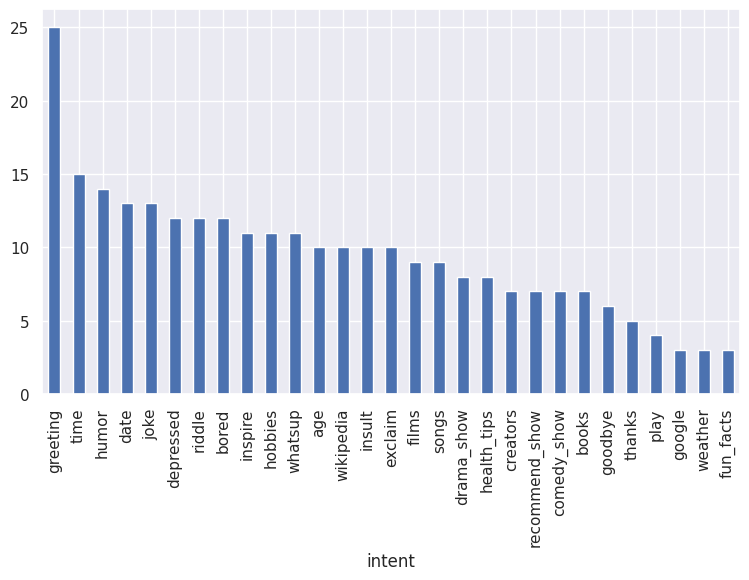

In [32]:
df['intent'].value_counts().plot(kind = 'bar', figsize = (9, 5))
plt.show()

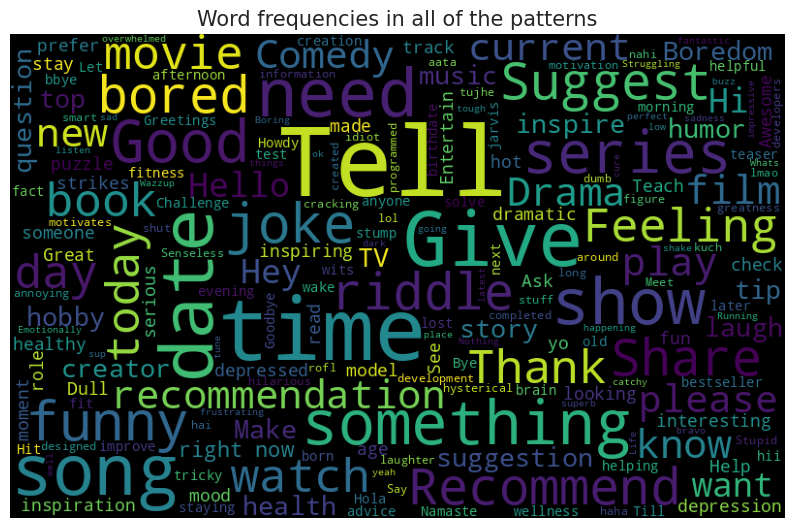

In [37]:
plt.figure(figsize = (10, 7))
all_sent = ' '.join([sentence for sentence in df['pattern']])
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 100, random_state = 101).generate(all_sent)
plt.imshow(word_cloud)
plt.title('Word frequencies in all of the patterns', fontsize = 15)
plt.axis('off')
plt.show()

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['pattern'])
seq = tokenizer.texts_to_sequences(df['pattern'])

In [41]:
seq[: 10]

[[60, 61],
 [12, 27, 3],
 [13, 129, 61],
 [62],
 [130],
 [63],
 [22, 35],
 [131],
 [86],
 [63]]

In [42]:
maxlen = max([len(i) for i in seq])
maxlen

8

In [43]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

284

In [45]:
pad_seq = pad_sequences(seq, maxlen = maxlen, padding = 'post')
pad_seq

array([[ 60,  61,   0, ...,   0,   0,   0],
       [ 12,  27,   3, ...,   0,   0,   0],
       [ 13, 129,  61, ...,   0,   0,   0],
       ...,
       [115,   2,  21, ...,   0,   0,   0],
       [283,   1,  25, ...,   0,   0,   0],
       [ 73,  30,  35, ...,   0,   0,   0]], dtype=int32)

In [47]:
le = LabelEncoder()

In [48]:
y_le = le.fit_transform(df['intent'])

In [51]:
pad_seq_s, y_le_s = shuffle(pad_seq, y_le)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(pad_seq_s, y_le_s, test_size = 0.2, random_state = 101, shuffle = True,
                                                   stratify = y_le_s)

In [56]:
print('The number of data in the training set is:', X_train.shape[0])
print('The number of data in the test set is:', X_test.shape[0])

The number of data in the training set is: 220
The number of data in the test set is: 55


In [57]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anmolkumar/glove-embeddings")

print("Path to dataset files:", path)

Mounting files to /kaggle/input/glove-embeddings...
Path to dataset files: /kaggle/input/glove-embeddings


In [59]:
glove_file = open('/kaggle/input/glove-embeddings/glove.6B.100d.txt', encoding = 'utf-8')
embedding_matrix = dict()
for line in glove_file:
    record = line.split()
    word = record[0]
    vector = np.asarray(record[1:])
    embedding_matrix[word] = vector
glove_file.close()

In [60]:
embedding_matrix['series']

array(['-0.60306', '-0.12727', '0.04492', '-0.26445', '0.23855',
       '-0.057307', '0.40148', '0.65752', '-1.2192', '-0.54203',
       '0.32482', '-0.43304', '0.0010481', '0.42314', '-0.29459',
       '0.64495', '0.053798', '0.61311', '0.18401', '0.65275', '0.90114',
       '-0.66002', '-0.077375', '0.39401', '1.7032', '-0.40581',
       '0.55797', '0.34985', '-0.29196', '0.58662', '-0.44293', '0.33279',
       '-0.69469', '0.36138', '-0.00094412', '0.19171', '-0.17079',
       '-0.67731', '-0.75038', '0.40546', '-0.019759', '0.32476',
       '-0.10229', '0.23223', '0.088904', '-0.11097', '-0.033615',
       '-0.40234', '0.33279', '-0.033548', '-0.96708', '0.1922',
       '0.31386', '1.0695', '0.51263', '-2.8874', '0.033803', '0.67321',
       '0.89788', '0.90397', '-0.95694', '1.1062', '-0.039357',
       '-0.24912', '1.6123', '-0.35618', '-0.075157', '0.19508',
       '-0.042009', '0.58326', '-0.030853', '0.01526', '-0.59582',
       '-0.034678', '-0.35916', '0.5451', '-0.036531', 

In [61]:
embedding_matrix['show']

array(['0.10735', '-0.13863', '0.057066', '-0.61203', '-0.096671',
       '-0.26425', '0.062813', '0.95611', '-0.26705', '-0.42122',
       '-0.25975', '-0.33355', '0.28623', '-0.20724', '0.16318',
       '0.31586', '0.61206', '0.28672', '-0.10276', '0.64146', '0.38259',
       '-0.71012', '-0.037712', '-0.49555', '0.71959', '-0.28056',
       '0.67913', '-0.076652', '0.42956', '-0.17922', '-0.085417',
       '0.43329', '0.22443', '0.80722', '0.071308', '0.63508', '0.18468',
       '-0.2115', '-0.58941', '-0.29348', '-0.053272', '-0.00012164',
       '-0.67823', '0.76149', '-0.45133', '-0.40854', '-0.31185',
       '-0.69396', '0.25989', '-1.1493', '-0.46673', '-0.2215', '0.57337',
       '0.86139', '-0.026505', '-2.8989', '-0.46397', '0.0027566',
       '1.0905', '0.57473', '-0.076244', '1.237', '-0.37543', '-0.28546',
       '1.1007', '0.13005', '0.40481', '-0.022947', '-0.063125', '0.3789',
       '0.27186', '-0.04361', '-0.51219', '0.14266', '0.20057', '0.20669',
       '0.32724', 

In [64]:
cosine_similarity([embedding_matrix['series']], [embedding_matrix['show']])

array([[0.69094392]])

In [67]:
cosine_similarity([embedding_matrix['breakfast']], [embedding_matrix['dinner']])

array([[0.84159633]])

In [68]:
cosine_similarity([embedding_matrix['dinner']], [embedding_matrix['show']])

array([[0.4797463]])

In [72]:
embedding_vectors = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    vec = embedding_matrix.get(word)
    if vec is not None:
        embedding_vectors[index] = vec

In [75]:
df_y_train = pd.DataFrame({
    'y' : y_train
})

In [76]:
df_y_train['y'].nunique()

29

In [98]:
model = Sequential()

In [99]:
model.add(Embedding(vocab_size, 100, embeddings_initializer = Constant(embedding_vectors), trainable = False))
model.add(Bidirectional(LSTM(15)))
model.add(Dense(29, activation = 'softmax'))

In [100]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [101]:
early_stopping = EarlyStopping(monitor = 'loss', patience = 4)

In [102]:
history = model.fit(X_train, y_train, epochs = 200, callbacks = [early_stopping])

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0245 - loss: 3.3944
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0778 - loss: 3.3504 
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0679 - loss: 3.3209 
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1333 - loss: 3.3002 
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1785 - loss: 3.2520 
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2163 - loss: 3.2194 
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2045 - loss: 3.1914 
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2503 - loss: 3.1533 
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2717 - loss: 3.1244 
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3117 - loss: 3.0477 
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3238 - loss: 3.0190 
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3385 - loss

In [103]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5407 - loss: 2.1639  


[2.0314888954162598, 0.5454545617103577]

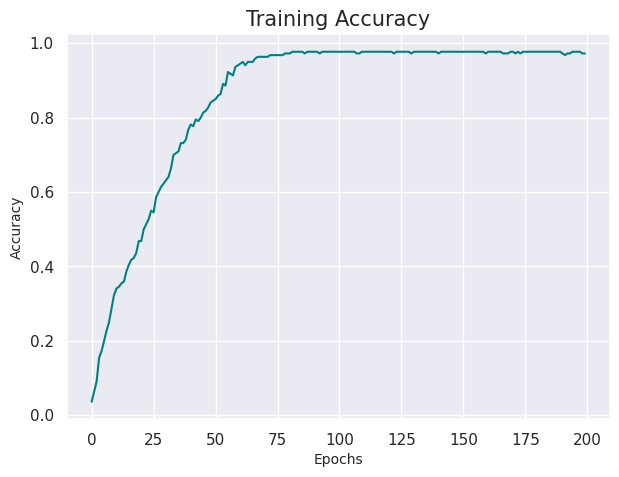

In [110]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], color = 'teal')
plt.title('Training Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.show()

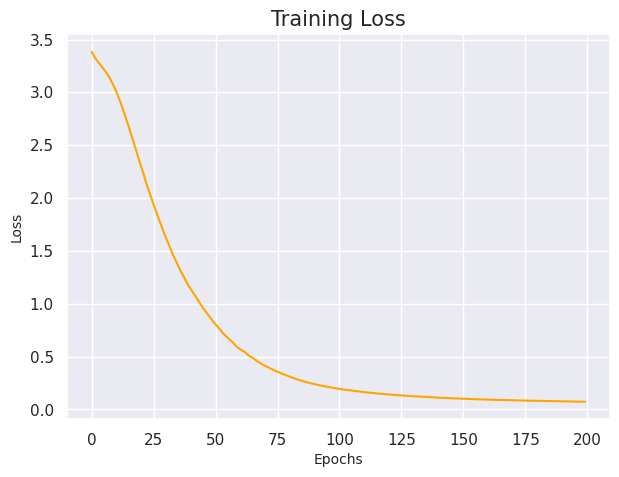

In [111]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], color = 'orange')
plt.title('Training Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.show()

In [112]:
y_p1 = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


In [113]:
y_pred1 = [np.argmax(i) for i in y_p1]

In [116]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       0.50      0.50      0.50         2
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.50      0.80      0.62         5
          14       0.67      1.00      0.80         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.40    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
while True:
    input_text = input('You: ')
    te = tokenizer.texts_to_sequences([input_text])
    pad_te = pad_sequences(te, maxlen = maxlen, padding = 'post')[0]
    predict = le.inverse_transform([np.argmax(model.predict(np.stack([pad_te])))])[0]
    print(random.choice(resp[predict]))
    if predict == 'goodbye':
        break
    print('=========================================================================')
    print('=========================================================================')

You:  hi


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Hello! How may I assist you?


You:  would you suggest a book to me


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Consider 'Pride and Prejudice' by Jane Austen for a timeless love story with witty social commentary.


You:  what can i do to stay fit?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Of course! A great health tip is to drink plenty of water daily. It keeps you hydrated and energized.


You:  which movie do you recommend to watch?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Certainly! If you're a Taylor Swift fan, you might enjoy 'Taylor Swift: The 1989 World Tour' film. It's a great concert experience!


You:  tell me another movie suggestion


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
For a gripping action movie, check out 'The Dark Knight'. Heath Ledger's Joker is iconic.


You:  i want a music


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Get the party started with Katy Perry's 'Teenage Dream'.


You:  tell me about your age


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
I don't age, but I was developed in 2023.


You:  what about comedy show?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
'The Marvelous Mrs. Maisel' is a comedy-drama that follows the journey of a housewife turned stand-up comedian in the 1950s.


You:  which drama show do you recommend?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
'The Handmaid's Tale' is a thought-provoking dystopian drama that delves into themes of power and resistance.


You:  please tell me another drama show


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
For a period drama, 'Downton Abbey' is a delightful exploration of an aristocratic family's life in early 20th-century England.


You:  thank you


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Happy to help!


You:  bye


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Bye! Come back again soon.
